## **DSC 540 Final Project Notebook**

# Detecting Cervical Cancer with ML
*   Pramatesh Shukla


In [ ]:
# Imports
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
#load in packages
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer.csv


In [ ]:
df = pd.read_csv('risk_factors_cervical_cancer.csv',
header=0)

# Exploratory Data Analysis (EDA) [20]
Explain your data. Record counts, missing values and data dictionary
- Create statistical summary of your data
- Show a snapshot of data
- State which columns are explanatory variables, and which column is the outcome variable.
- Do cleaning, data transformation, data preparation as necessary. Explain some of the data cleaning you have done.
- You do not have to use all the columns; you can drop some of them
- Data dictionary: Explain your variables. If you have too many variables you can group them (Ex. Variables that start with “time” refer to date and time related attributes). Or you can just talk about the columns you have ended up using after dropping some of them. After all, in your models you should avoid having too many columns.
- Explain any new feature creation done
- Provide figures explaining the data. Do exploratory analysis. Create proper visualizations of your variables depending on the data type.
- Make sure the figures are legible, meaning properly saved and have enough resolution, with proper labels and axis tick marks and titles. They should not look blurry.

## Data Cleaning & Transformations

In [ ]:
numVars = ['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN','Dx:HPV', 'Dx', 'Hinselmann' 'Schiller', 'Citology','Biopsy']  
allVars= list(df.columns)

#adds variables that are not numberic into an object variable list
objVars=[]
for variable in allVars:
    if variable not in numVars:
        objVars.append(variable)


In [ ]:
for objectVariable in objVars:
    df[objectVariable] = pd.to_numeric(df[objectVariable], errors='coerce')

In [ ]:
#drop variables missing more than 5% of data

df.drop(['Hormonal Contraceptives', 'Hormonal Contraceptives (years)' , 'IUD', 'IUD (years)',
            'STDs','STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',           
'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',      
'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV' , 'STDs:Hepatitis B',                     
'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

 #fill in missing data with averages
df=df.fillna(df.mean())

## Data Summary

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.140845,5.816901,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,0.514804,0.104914,0.176627,0.058433,0.0,0.005312,0.057105,0.023904,0.001328,0.001328,0.001328,0.0,0.023904,0.001328,0.002656,0.087413,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,1.805585,0.287247,0.526440,0.219868,0.0,0.068137,0.217508,0.143183,0.034137,0.034137,0.034137,0.0,0.143183,0.034137,0.048244,0.302545,1.684784,1.644843,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# How many rows and variables are there?
print(df.shape) 
print("The number of rows in the final_dataframe dataset: ", len(df))
print("The number of variables/columns/features in the final_dataframe dataset: ", len(df.columns))

(858, 36)
The number of rows in the final_dataframe dataset:  858
The number of variables/columns/features in the final_dataframe dataset:  36


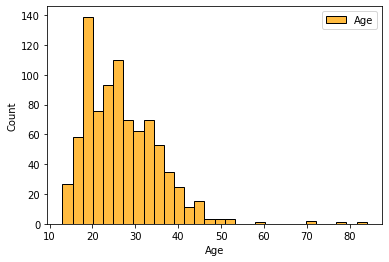

In [ ]:
sns.histplot(data=df, x="Age",color="orange", bins = 30,kde=False, label="Age")
plt.legend()
plt.show()

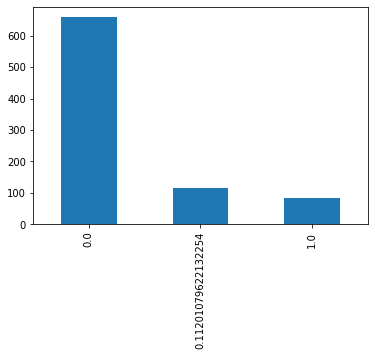

In [ ]:
df.IUD.value_counts().plot.bar()


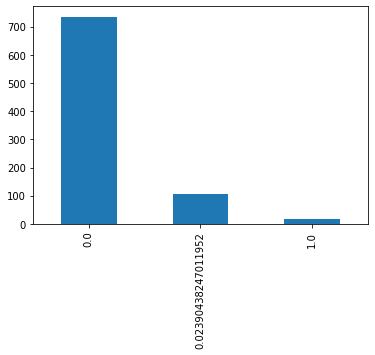

In [ ]:
df['STDs:syphilis'].value_counts().plot.bar()


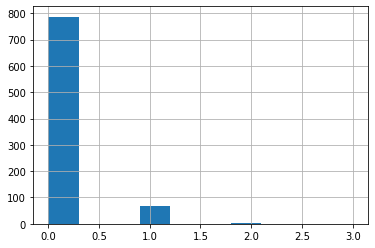

In [ ]:
df['STDs: Number of diagnosis'].hist()


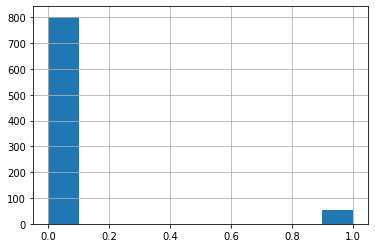

In [ ]:
df.Biopsy.hist()


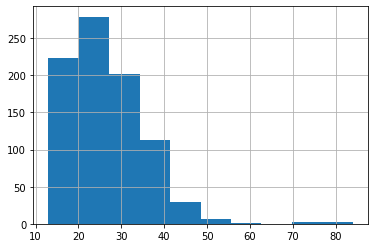

In [ ]:
df.Age.hist()


Text(0.5, 1.0, 'Heat map for correlation between variables')

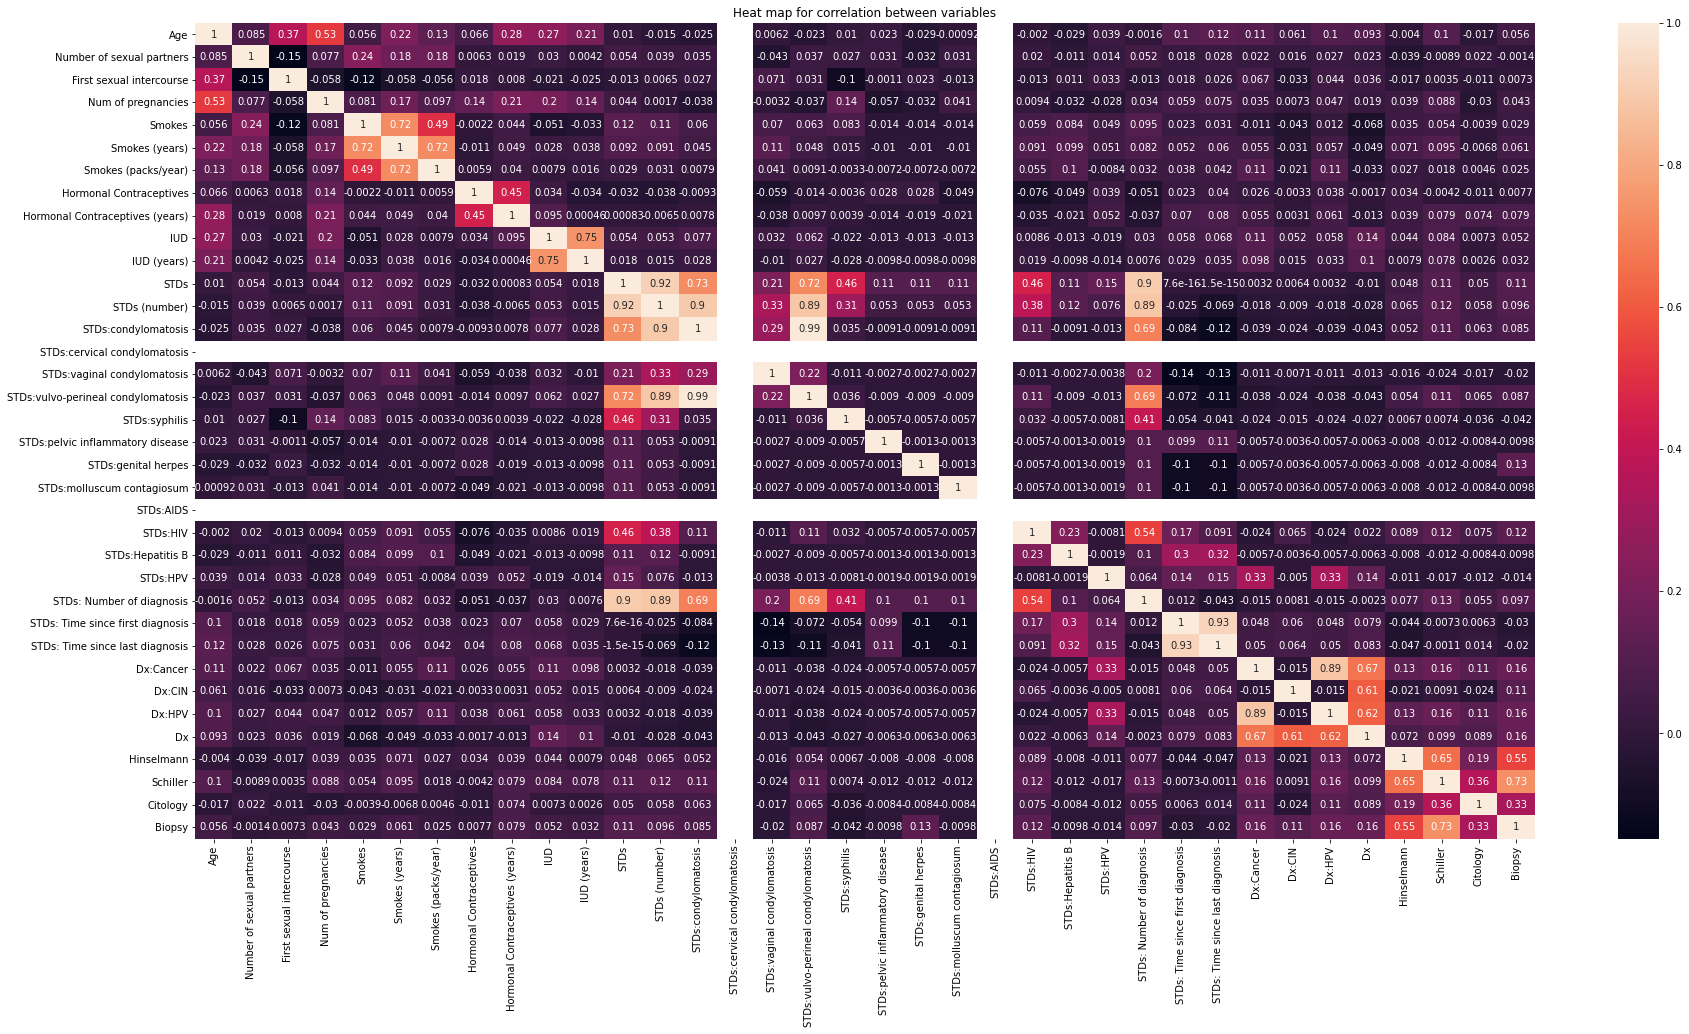

In [ ]:
corr_plot = df.corr()
plt.figure(figsize = (30,15))
sns.heatmap(corr_plot, annot = True)
plt.title("Heat map for correlation between variables")

# Research Questions [30]
- Answer the research questions that you have thought about in your proposal. These questions should be a little more involve compared to EDA. Give each question its own section.
- The answers can involve checking the statistical summaries, figures, correlations, statistical tests etc. Some of these questions will obviously employ some machine learning applications (regression, classification, clustering, etc.)

## Questions
-  Does the number of pregnancies affect cervical cancer?
         - Yes the # of pregnancies does affect cervical cancer and often increase the likelihood of developing Cervical cancer 


-  Which age group is most likely to get affected by cervical cancer? 
        - Age group that is affected the most is between 18-30 


-  Which STD diseases have more chances of being affected by cervical cancer?
       - Dx:HPV, Hinselmann, Schiller, Citology






# Machine Learning [30]
There should be at least 4 different ML applications of regression or classification applied in your analysis.
- Briefly explain the models you are applying. Be concise.
- The ML applications should be part of the research questions.


## Train Test Split

In [ ]:
# Train Test Split

In [ ]:
#define x and y variables
y = df.Biopsy
X = df.drop(columns=['Biopsy'])

In [ ]:
#create test & train splites
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=555)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=555)

In [ ]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

## Support Vector Machines 

In [ ]:
from sklearn.svm import SVR

In [ ]:
#SVR fit RBF manually
svr = SVR(kernel='rbf',  C=.01, gamma=0.01)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('RBF MODEL Results:C=.01, gamma=0.01 ')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)
print('')

#grid search formula - rbf
svr = SVR(kernel='rbf',  C=.1, gamma=0.01)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('RBF MODEL Results C=.1, gamma=0.01')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)
print('')

#grid search formula - rbf
svr = SVR(kernel='rbf',  C=1, gamma=0.01)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('RBF MODEL Results C=1, gamma=0.01')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)
print('')

#grid search formula - rbf
svr = SVR(kernel='rbf',  C=1, gamma=0.1)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('RBF MODEL Results C=1, gamma=0.1')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)


RBF MODEL Results:C=.01, gamma=0.01 
Model R2:  0.025917410253563977
Model Validation R2:  0.015227589685925191
Training Data RMSE:  0.06372290631688277
Validation Data RMSE:  0.05955399441833222

RBF MODEL Results C=.1, gamma=0.01
Model R2:  0.3062683622069763
Model Validation R2:  0.2636907624564142
Training Data RMSE:  0.04538280083175487
Validation Data RMSE:  0.044528213588814876

RBF MODEL Results C=1, gamma=0.01
Model R2:  0.661342953402054
Model Validation R2:  0.35180518728251753
Training Data RMSE:  0.022154395819281268
Validation Data RMSE:  0.039199504224795734

RBF MODEL Results C=1, gamma=0.1
Model R2:  0.837654598100384
Model Validation R2:  0.1686049367690401
Training Data RMSE:  0.010620373410963904
Validation Data RMSE:  0.050278517590977526


In [ ]:
#SVR fit linear manually
svr = SVR(kernel='linear',  C=.001, gamma=.001)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('linear MODEL Results C=.001, gamma=.001')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)
print('')
#grid search formula - linear
svr = SVR(kernel='linear',  C=.0001, gamma=.0001)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('linear MODEL Results  C=.01, gamma=.01')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)

linear MODEL Results C=.001, gamma=.001
Model R2:  0.4273074102531237
Model Validation R2:  0.36298847177280713
Training Data RMSE:  0.037464622229120066
Validation Data RMSE:  0.03852319642500581

linear MODEL Results  C=.01, gamma=.01
Model R2:  0.05197102675215526
Model Validation R2:  0.04470245139656448
Training Data RMSE:  0.062018520897379574
Validation Data RMSE:  0.05777150566112111


In [ ]:
##SVR fit poly manually
svr = SVR(kernel='poly',  C=.01, gamma=.01)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('Poly MODEL Results C=.01, gamma=.01')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)
print('')
#grid search formula - poly
svr = SVR(kernel='poly',  C=.0001, gamma=.0001)
#fit training data 
rbfModel=svr.fit(X_train, y_train)
R2Train=rbfModel.score(X_train, y_train)
R2Val=rbfModel.score(X_val, y_val)
y_pred=rbfModel.predict(X_train)
RMSETrain=metrics.mean_squared_error(y_train, y_pred)
y_pred=rbfModel.predict(X_val)
RMSETest=metrics.mean_squared_error(y_val, y_pred)

print('RBF MODEL Results  C=.01, gamma=.01')
print('Model R2: ', R2Train)
print('Model Validation R2: ', R2Val)
print('Training Data RMSE: ', RMSETrain)
print('Validation Data RMSE: ', RMSETest)

Poly MODEL Results C=.01, gamma=.01
Model R2:  0.05274453289333658
Model Validation R2:  -230670.61039400194
Training Data RMSE:  0.06196791937766361
Validation Data RMSE:  13949.83821032395

RBF MODEL Results  C=.01, gamma=.01
Model R2:  -0.013420002570307066
Model Validation R2:  -0.020657449539525974
Training Data RMSE:  0.0662962961900932
Validation Data RMSE:  0.0617241378985426


## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

dtree = DecisionTreeClassifier()

dtree = dtree.fit(X_train, y_train)
predictions = dtree.predict(X_val)

In [ ]:
dtree.score(X, y)
ypredicted = dtree.predict(X_val)

mse = metrics.mean_squared_error(y_val,ypredicted)
rmse = metrics.mean_squared_error(y_val,ypredicted, squared = False)

y2predicted = dtree.predict(X_train)
rmse2 = metrics.mean_squared_error(y_train,y2predicted, squared = False)  

print("model  R2",metrics.r2_score(y_val,ypredicted))
print("R2  on validation data",metrics.r2_score(y_train,dtree.predict(X_train)))
print("RMSE on training data",rmse)
print("RMSE on validation data",rmse2)

model  R2 -0.140399385560676
R2  on validation data 1.0
RMSE on training data 0.2626128657194451
RMSE on validation data 0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_val,predictions))

print (confusion_matrix(y_val,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       217
           1       0.47      0.53      0.50        15

    accuracy                           0.93       232
   macro avg       0.72      0.75      0.73       232
weighted avg       0.94      0.93      0.93       232

[[208   9]
 [  7   8]]


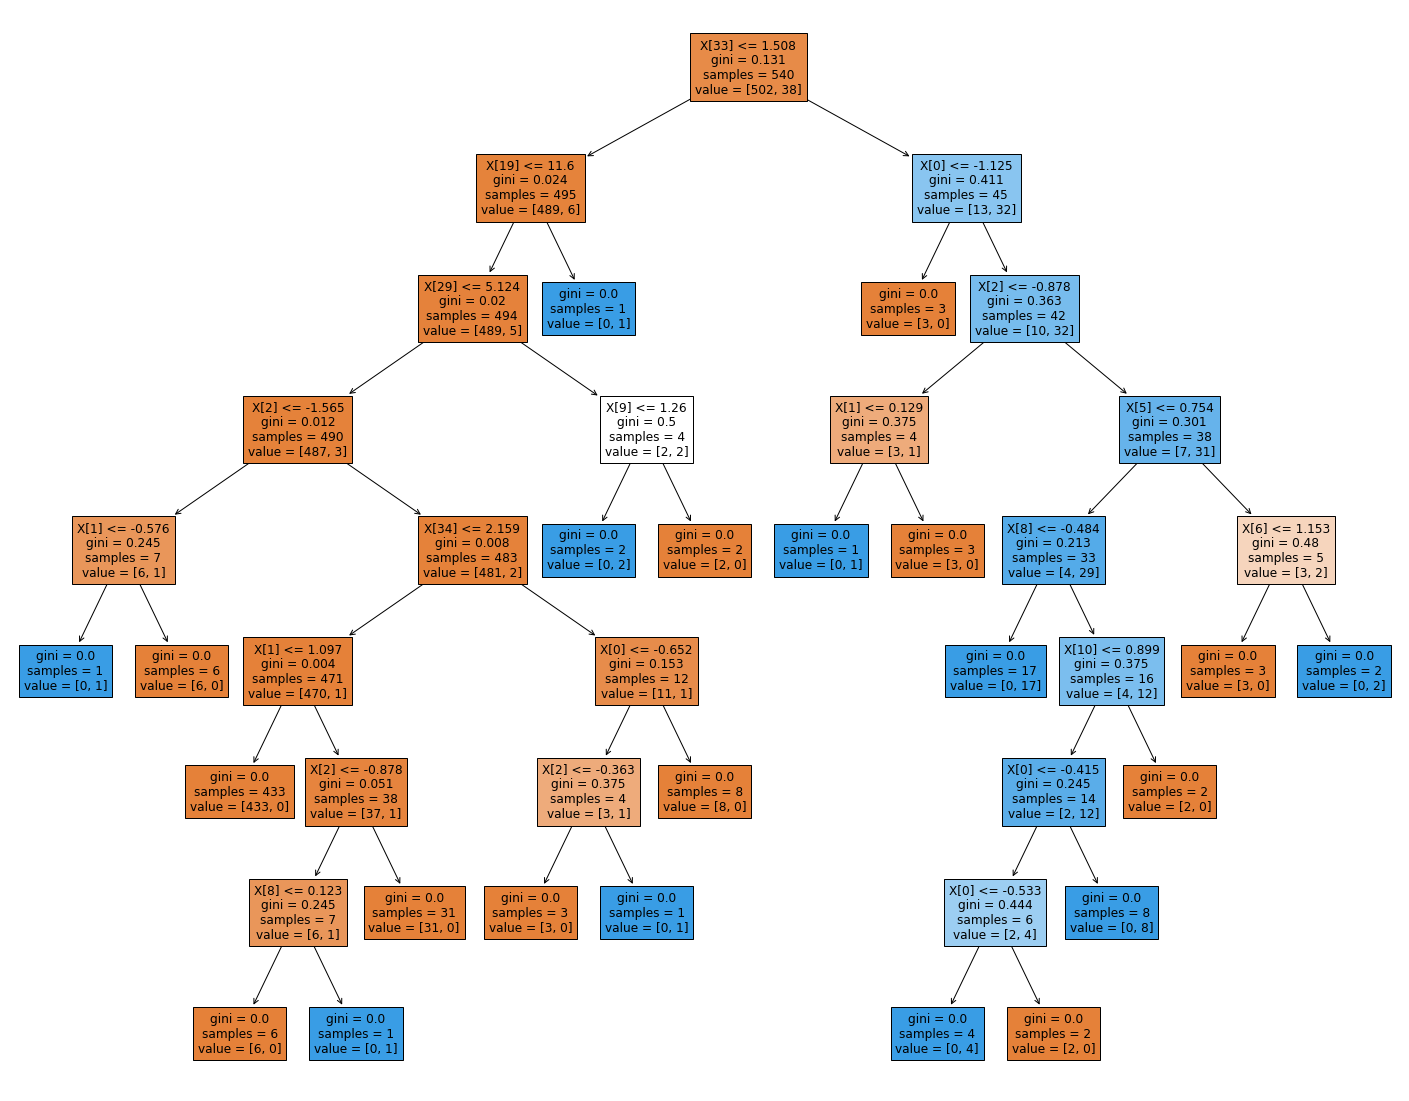

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
fig = plt.figure(figsize = (25,20))
_ = plot_tree(dec_tree, filled = True)

## Random Forest 

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score

In [ ]:
# Code
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf = RandomForestClassifier(random_state = 2020)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_val)
print("-"*40 + "Training and Testing Accuracy" + "-"*40)
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train) * 100)
print("Testing Accuracy: ", accuracy_score(y_val, y_pred)* 100)
print("-"*40 + "Classification Report" + "-"*40)
print(classification_report(y_val, y_pred))
print("-"*40 + "Confusion Matrix" + "-"*40)
print(confusion_matrix(y_val, y_pred))

----------------------------------------Training and Testing Accuracy----------------------------------------
Training Accuracy:  100.0
Testing Accuracy:  94.82758620689656
----------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       217
           1       0.59      0.67      0.62        15

    accuracy                           0.95       232
   macro avg       0.78      0.82      0.80       232
weighted avg       0.95      0.95      0.95       232

----------------------------------------Confusion Matrix----------------------------------------
[[210   7]
 [  5  10]]


In [ ]:
print('-' * 40 + 'Determining Max Depth' + '-' * 40)
max_depths = range(4,25)
depth = []
for i in max_depths:
    clf = RandomForestClassifier(max_depth=i)
    # Perform 5-fold cross validation to save computing time
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append((i,scores.mean()))
#Finding best depth value
print(depth)

# Determining Min Samples Split
print('-' * 40 + 'Determining Min Samples Split' + '-' * 40)
min_samples_split = range(2, 20, 2)
split = []
for i in min_samples_split:
    clf = RandomForestClassifier(min_samples_split = i)
    #Perform 5-fold cross validation to save computing time
    score = cross_val_score(estimator = clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    split.append((i, scores.mean()))
#Finding the best split value
print(split)

# Determining n_estimators
print('-' * 40 + 'Determining n estimators' + '-' * 40)
n_estimators = range(10, 15)
estimators = []
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators = i)
    #Perform 5-fold cross validation to save computing time
    score = cross_val_score(estimator = clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    estimators.append((i, scores.mean()))
#Finding the best estimators value
print(estimators)

#GridSearch Cross Validation
print('-' * 40 + 'Grid Search Cross Validation' + '-' * 40)
param_grid = {
    'max_depth': range(4, 25),
    'min_samples_split': range(2,20, 2),
    'n_estimators': range(10, 15)
}

clf = RandomForestClassifier() 
# Perform 5-fold cross validation to save computing time
clf_gscv = GridSearchCV(clf, param_grid, cv = 5, n_jobs=4)
clf_gscv.fit(X_train, y_train)
print(clf_gscv.best_params_)

----------------------------------------Determining Max Depth----------------------------------------
[(4, 0.9462962962962964), (5, 0.9555555555555555), (6, 0.961111111111111), (7, 0.9537037037037038), (8, 0.951851851851852), (9, 0.9574074074074075), (10, 0.961111111111111), (11, 0.9555555555555555), (12, 0.9574074074074073), (13, 0.9555555555555555), (14, 0.9574074074074075), (15, 0.9592592592592591), (16, 0.9592592592592591), (17, 0.961111111111111), (18, 0.9555555555555555), (19, 0.9537037037037036), (20, 0.9574074074074075), (21, 0.9537037037037038), (22, 0.9574074074074075), (23, 0.9592592592592591), (24, 0.9592592592592591)]
----------------------------------------Determining Min Samples Split----------------------------------------
[(2, 0.9592592592592591), (4, 0.9592592592592591), (6, 0.9592592592592591), (8, 0.9592592592592591), (10, 0.9592592592592591), (12, 0.9592592592592591), (14, 0.9592592592592591), (16, 0.9592592592592591), (18, 0.9592592592592591)]
--------------------

In [ ]:
rf = RandomForestClassifier(max_depth = 6, min_samples_split = 12, n_estimators = 12, random_state = 2020)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print("-"*40 + "Testing Accuracy" + "-"*40)
print("Testing Accuracy: ", accuracy_score(y_val, y_pred)* 100)
print("Balanced Accuracy Score: ", balanced_accuracy_score(y_val, y_pred) * 100)
print("-"*40 + "Classification Report" + "-"*40)
print(classification_report(y_val, y_pred))
print("-"*40 + "Confusion Matrix" + "-"*40)
print(confusion_matrix(y_val, y_pred))

----------------------------------------Testing Accuracy----------------------------------------
Testing Accuracy:  94.82758620689656
Balanced Accuracy Score:  72.41167434715821
----------------------------------------Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       217
           1       0.64      0.47      0.54        15

    accuracy                           0.95       232
   macro avg       0.80      0.72      0.76       232
weighted avg       0.94      0.95      0.94       232

----------------------------------------Confusion Matrix----------------------------------------
[[213   4]
 [  8   7]]


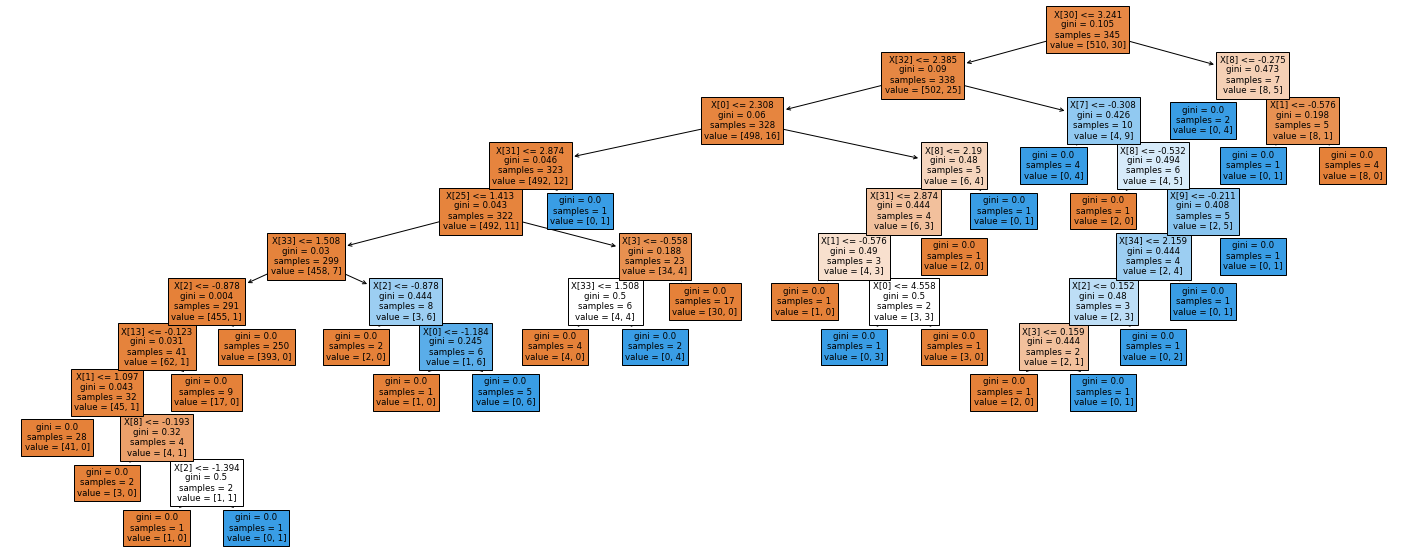

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


rftree = RandomForestClassifier()

rftree = rftree.fit(X_train, y_train)
predictions = rftree.predict(X_val)

rfc_tree = RandomForestClassifier()
rfc_tree.fit(X_train, y_train)
fig = plt.figure(figsize = (25,10))
tree.plot_tree(rf.estimators_[0], filled = True);


In [ ]:
def fit_predict_score(name,clf):
    clf.fit(X_train, np.ravel(y_train))
    predicted = clf.predict(X_test)
    confusion_matrix =  pd.crosstab(index=np.ravel(y_test), columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    accuracy = np.round(metrics.accuracy_score(y_test , predicted),3)
    plt.title(name + " " + str(accuracy), fontsize = 15)
    plt.show()
    print (metrics.classification_report(y_test,predicted))

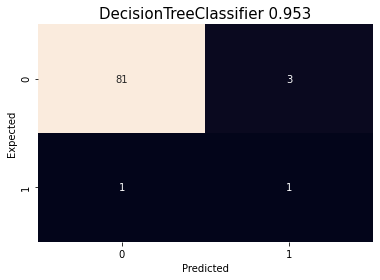

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        84
           1       0.25      0.50      0.33         2

    accuracy                           0.95        86
   macro avg       0.62      0.73      0.65        86
weighted avg       0.97      0.95      0.96        86



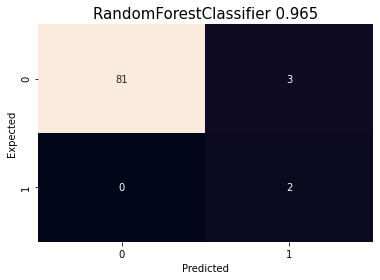

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        84
           1       0.40      1.00      0.57         2

    accuracy                           0.97        86
   macro avg       0.70      0.98      0.78        86
weighted avg       0.99      0.97      0.97        86



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=100)
names = ["DecisionTreeClassifier", "RandomForestClassifier"]
classifiers= [clf1, clf2]
for name, clf in zip(names, classifiers):
    fit_predict_score(name,clf)

In [ ]:
# K Nearest Neighbor
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_val_score, train_test_split

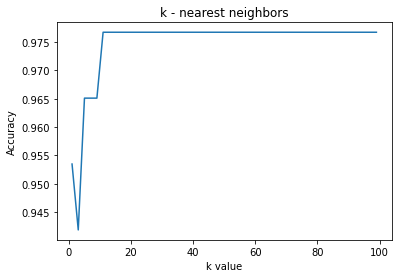

Best Accuracy: 0.9767441860465116


In [ ]:
# Code
accuracy = []
x_range = []
for j in range(1,101,2):
    x_range.append(j)
    #X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2)
    clf = neighbors.KNeighborsClassifier(n_neighbors=j)
    clf.fit(X_train,y_train)
    acc = clf.score(X_test,y_test)
    accuracy.append(acc)
plt.title('k - nearest neighbors')
plt.plot(x_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()
print("Best Accuracy:",acc)
test_label = np.array(df['Biopsy'])

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=17)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(predictions)
print(y_test)

df_ans = pd.DataFrame({'Biopsy' :y_test})
df_ans['predictions'] = predictions

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0]
584    0
324    0
106    0
73     0
554    0
      ..
302    0
248    0
680    0
154    0
426    0
Name: Biopsy, Length: 86, dtype: int64


In [ ]:
df_ans


,Biopsy,predictions
584,0,0
324,0,0
106,0,0
73,0,0
554,0,0
...,...,...
302,0,0
248,0,0
680,0,0
154,0,0


In [ ]:
df_ans[ df_ans['Biopsy'] != df_ans['predictions'] ]


,Biopsy,predictions
385,0,1
354,0,1


total test case number:  86


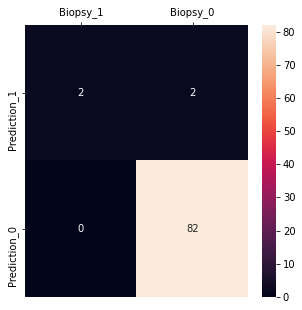

In [ ]:

cols = ['Biopsy_1','Biopsy_0']  #Gold standard
rows = ['Prediction_1','Prediction_0'] #diagnostic tool (our prediction)

B1P1 = len(df_ans[(df_ans['predictions'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B1P0 = len(df_ans[(df_ans['predictions'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 1)])
B0P1 = len(df_ans[(df_ans['predictions'] != df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])
B0P0 = len(df_ans[(df_ans['predictions'] == df_ans['Biopsy']) & (df_ans['Biopsy'] == 0)])

conf = np.array([[B1P1,B0P1],[B1P0,B0P0]])
df_cm = pd.DataFrame(conf, columns = [i for i in cols], index = [i for i in rows])

f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(df_cm, annot=True, ax=ax) 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.

print('total test case number: ', np.sum(conf))

In [ ]:
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) 
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

model_efficacy(conf)

total_num:  86
G1P1:  2
G0P1:  2
G1P0:  0
G0P0:  82
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.023809523809523808
false_negative_rate:  0.0


(86, 1.0, 1.0, 0.023809523809523808, 0.0)

# Results and Conclusions [5]
Were you able to answer your research questions?
- Evaluate the results, were you were expecting these, or were the results contrary to your expectations. Provide some insights. Compare to real-life scenarios or outcomes – if there is any. (Example: You found BMI is negatively correlated with being healthy and based on your regression or classification models as the BMI increases the chance of
being unhealthy also increases. Is this consistent to the general knowledge we have or is it quite different?)
- What was the best model based on what metric (error value, or accuracy score of your choice)?
- What more could you do on this data if you had more time?

### SVM
The SVM model produced a 30% accuracy in classifying cervical cancer. Given the limited variables & data samples , this is expected. Since SVM is a black box model the 30% suggests that there should be more data pooled for better performing models.

### Decision Tree
When running the Decision tree classification algorithm, we can see that based on the classification, metrics score precision and recall are both the same and they are both 97%. Also, we can see that the accuracy score results in 94% which is significantly high. Parent Node:
X[33] <= 1.508
For Decision Tree the parent node was Schiller diagnosis.


### Random Forest

After running the Random Forest Classifier algorithm, we can see that   there seems to be a high classification metric score for RFC, both Training Accuracy 100% and Testing accuracy 94% seem to be high. To get an accurate score I decided to perform 5-fold cross validation split and Grid search with Cross-validation to get a accurate result and determine whether or not the dataset is balanced or imbalanced. Based on the results after performing Grid Search we can see that the recall increased and precision decrease compared to running standard RFC. For final result we can conclude that model with Grid search has a optimal score and the dataset is balanced. Training score -> 95%, Testing score -> 72%

I also was able to visualize Random Forest tree to determine which variable was the parent node in which from the results you can see that 
- X[30] <= 3.241 this node was Dx: HPV

Lastly I ran a confusion maxtrix visualization for both Decision Tree and Random Forest Classifier to compare the classifcation metric reports for both ML classification algorthims. In which the Random Forest performed better than Decision Tree.

- DT => 95% acurracy
- RF => 97% acurracy 



### KNN 
From KNN classifier, After putting multiple value, We can see that 17 is the best value with almost 98% accuracy.  by looking at the transition matrix, there are only 2 false positives. So, there are two predictions. 

# References [5]
- Provide the sources you have made use of.
- It is OK to use other people’s code – as long as you provide proper referencing. State within the comment of a code block the source of code if it is taken from somewhere.
- Of course, the code blocks taken should not constitute the majority of your work – that’s plagiarism. (Do not go to Kaggle and copy paste very large chunks)
- The things to cite include many different sources such as:
    - Papers, conference proceedings
    - Links to blogs, websites, news articles
    - Links to coding samples from the sites you have used

REFERENCES:

Detect Cervical Cancer
“The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values)”


https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29